In [19]:
import torch
from torch.utils.data import DataLoader
from dataset import SingleFileTestDataset
import numpy as np
from model import Model
from datetime import date
from esm_pretrained import ESM
import time
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_path = os.path.abspath('')
print(dir_path)

/home/lukezhang/uhn_research/llps-v2


In [4]:
training = pd.read_csv(dir_path + '/data/training_data_features.csv')
testing = pd.read_csv(dir_path + '/data/test_set_1_pos.csv')

In [16]:
training = training[['Category', 'Sequence_length']]
testing['length'] = testing['sequences'].str.len()

train_pos = training.loc[training['Category'] == 'LLPS+']
train_neg = training.loc[training['Category'].isin(['LLPS-', 'PDB*'])]

test_pos = testing.loc[testing['labels'] == 1]
test_neg = testing.loc[testing['labels'] == 0]

In [18]:
a = train_pos['Sequence_length']
b = train_neg['Sequence_length']
c = test_pos['length']
d = test_neg['length']

In [20]:
train_dict = {'POS': a, 'NEG': b}
test_dict = {'POS': c, 'NEG': d}

[Text(1, 0, 'POS'), Text(2, 0, 'NEG')]

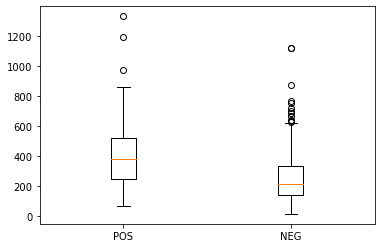

In [21]:
fig, ax = plt.subplots()
ax.boxplot(train_dict.values())
ax.set_xticklabels(train_dict.keys())

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(test_dict.values())
ax.set_xticklabels(test_dict.keys())